## os.chdir('address') should be the address that contains numpy files.

In [ ]:
import os 
os.getcwd()
#os.chdir(r'/home/gail11/orgunetr/orgswinunetr_res/predictions')

In [2]:
os.getcwd()

'/home/gail11/orgunetr/orgswinunetr_res/predictions'

## tp_2 address should be the address of the baseline prediction

(1, 224, 224, 224)
(1, 224, 224, 224)


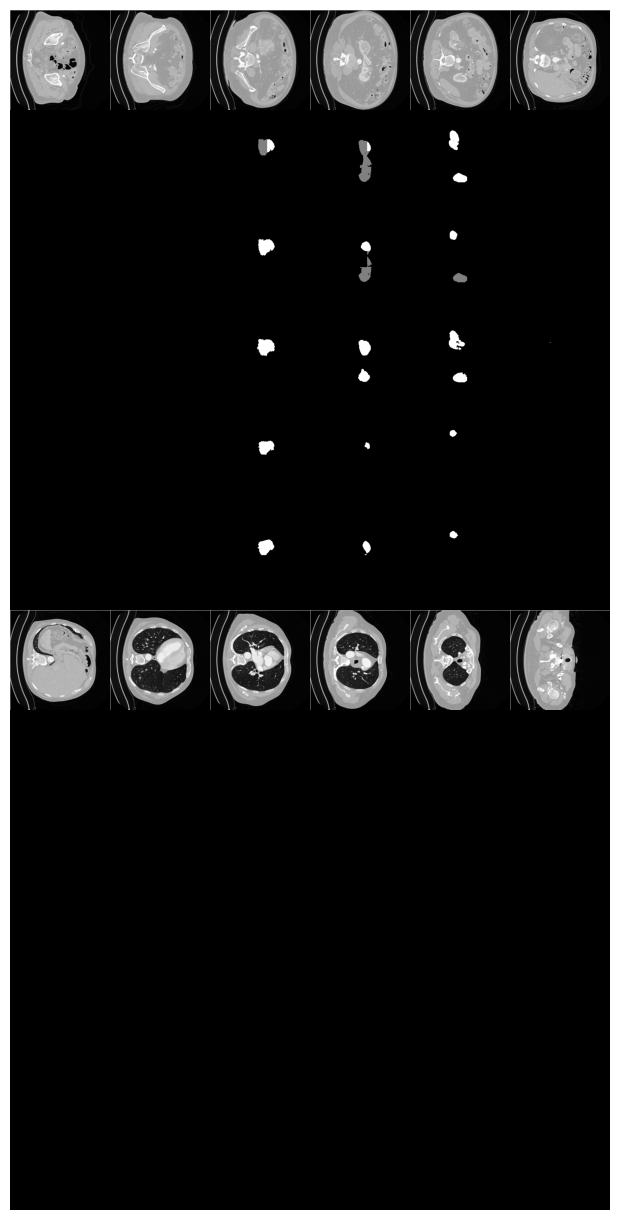

45
가 0번째에서 제일 잘 나옴
[0]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 72, 차이 = 58
(1, 224, 224, 224)
(1, 224, 224, 224)


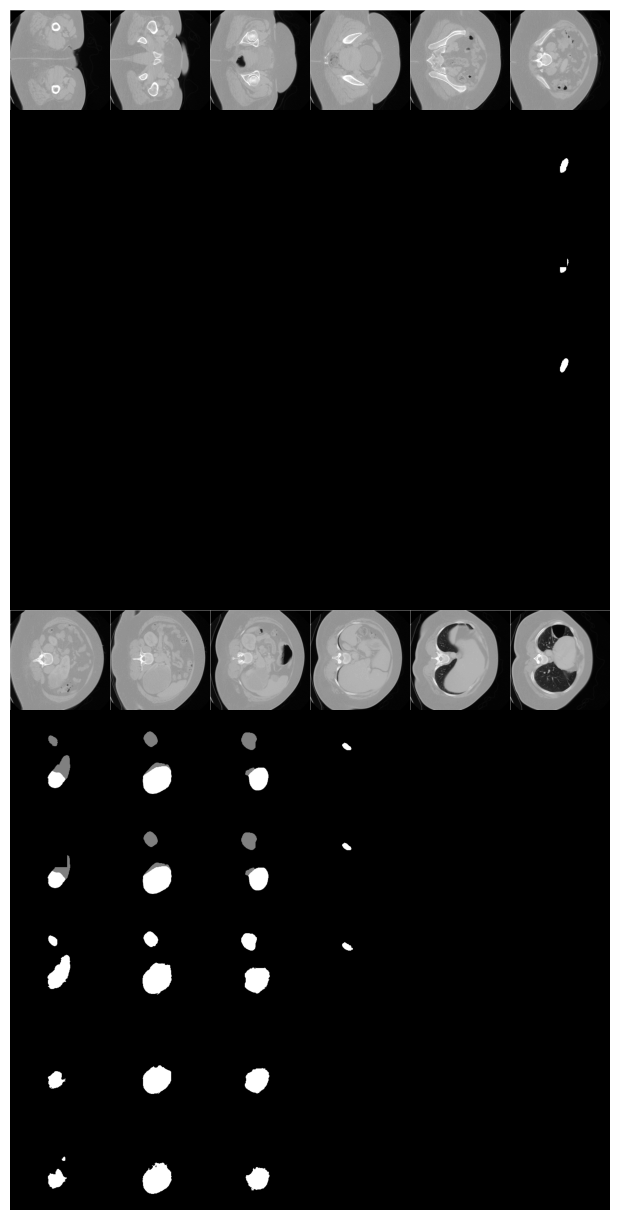

145
가 1번째에서 제일 잘 나옴
[1]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 169, 차이 = 498
(1, 224, 224, 224)
(1, 224, 224, 224)


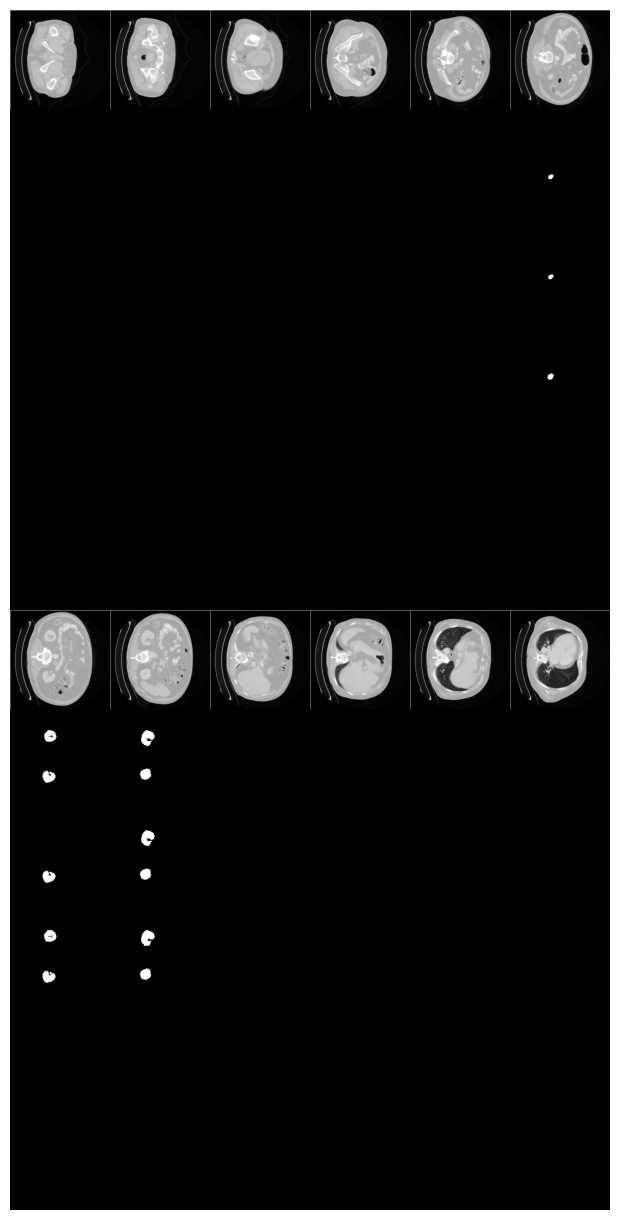

131
가 2번째에서 제일 잘 나옴
[2]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 123, 차이 = 37
(1, 224, 224, 224)
(1, 224, 224, 224)


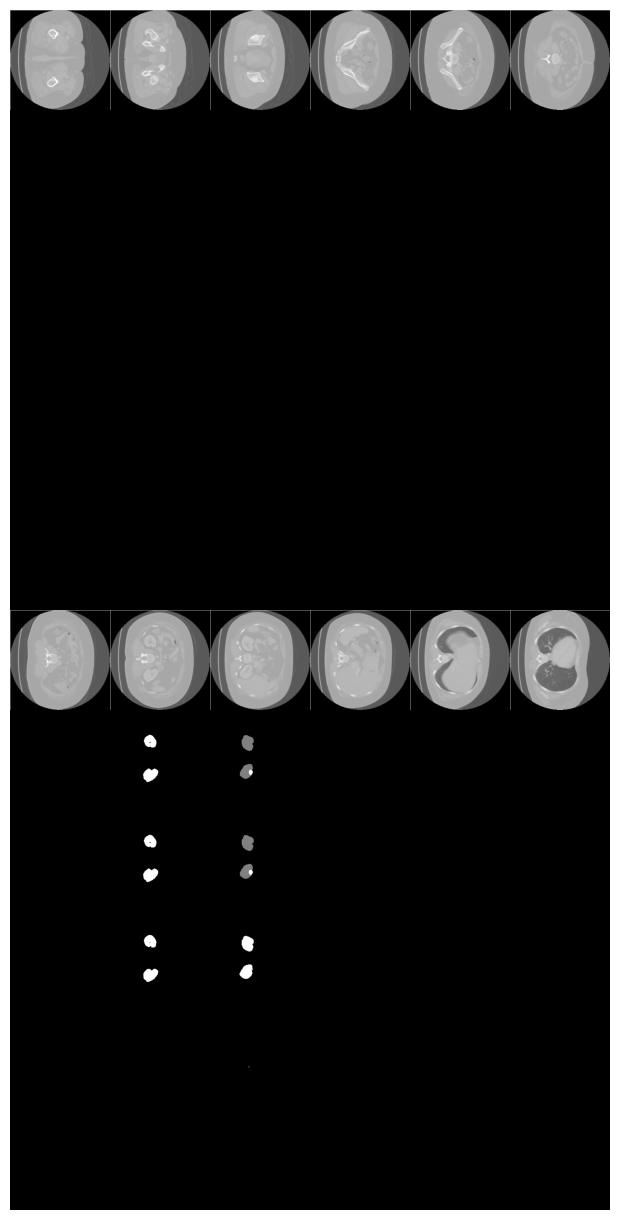

165
가 3번째에서 제일 잘 나옴
[3]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 165, 차이 = 19
(1, 224, 224, 224)
(1, 224, 224, 224)


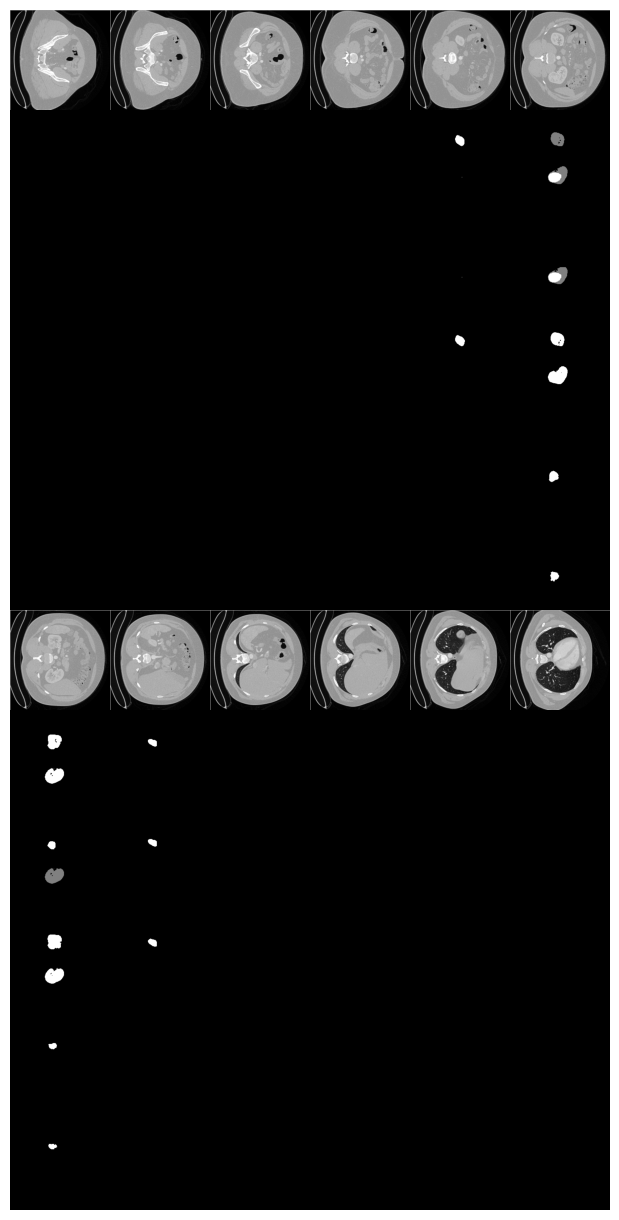

99
가 4번째에서 제일 잘 나옴
[4]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 107, 차이 = 188
(1, 224, 224, 224)
(1, 224, 224, 224)


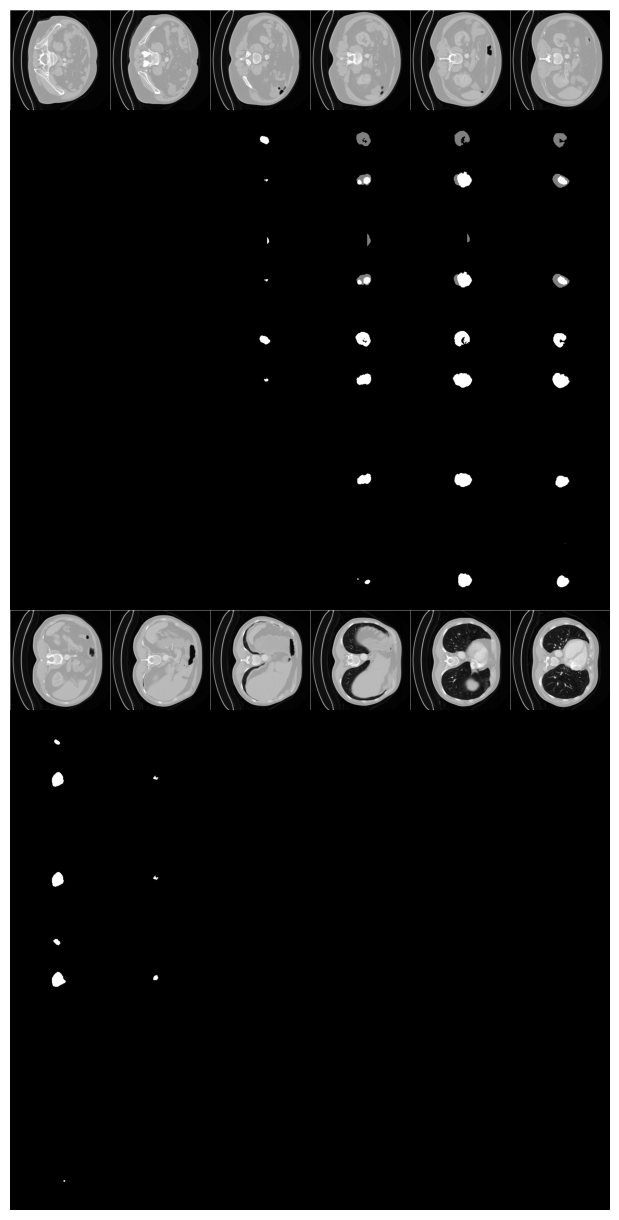

85
가 5번째에서 제일 잘 나옴
[5]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 61, 차이 = 477
(1, 224, 224, 224)
(1, 224, 224, 224)


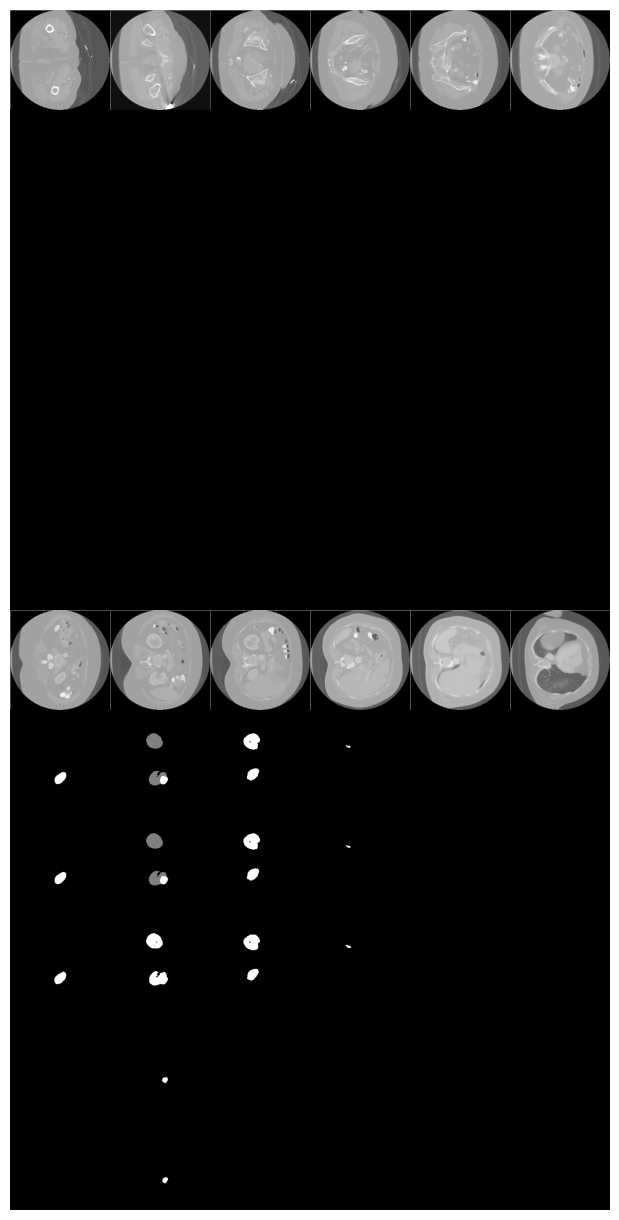

138
가 6번째에서 제일 잘 나옴
[6]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 134, 차이 = 28
(1, 224, 224, 224)
(1, 224, 224, 224)


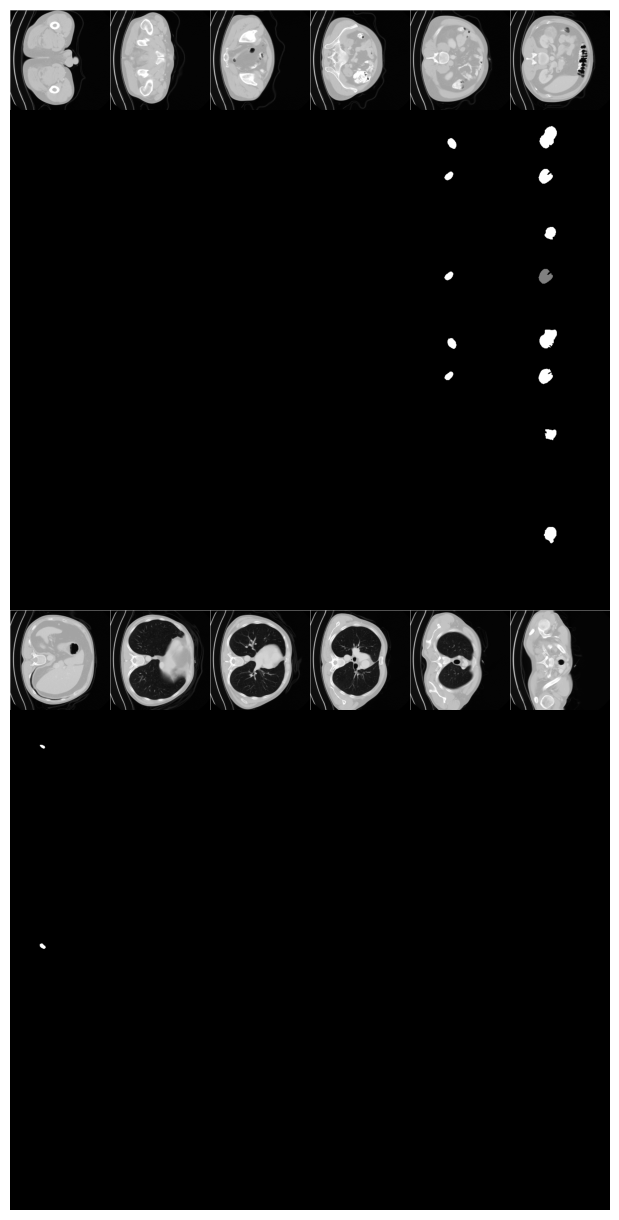

92
가 7번째에서 제일 잘 나옴
[7]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 83, 차이 = 239
(1, 224, 224, 224)
(1, 224, 224, 224)


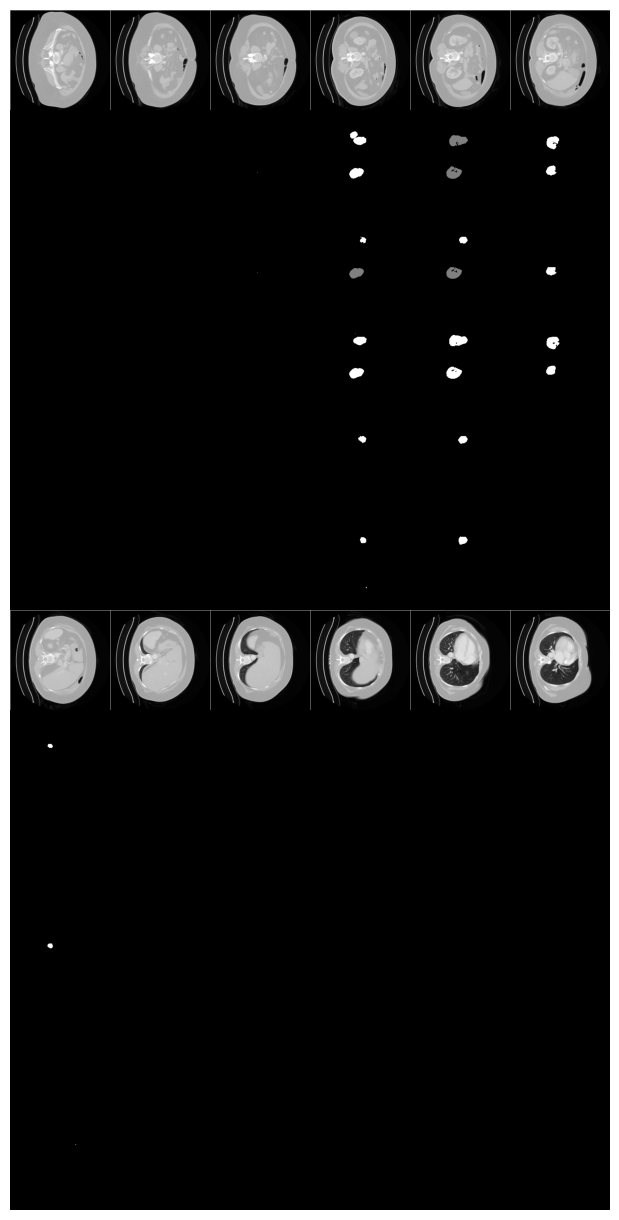

73
가 8번째에서 제일 잘 나옴
[8]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 57, 차이 = 73
(1, 224, 224, 224)
(1, 224, 224, 224)


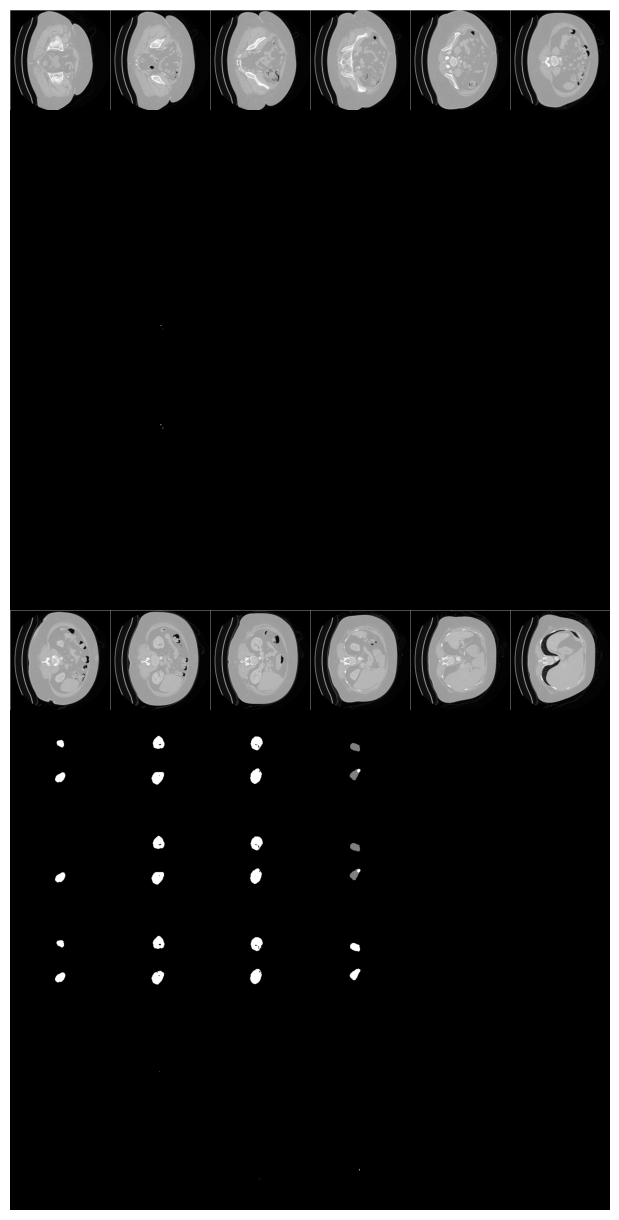

171
가 9번째에서 제일 잘 나옴
[9]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 157, 차이 = 33


In [22]:
import numpy as np
import matplotlib.pyplot as plt
image_size = 224
max_list = []
max_diff_list_2 = []
max_diff_index_list_2 = [] 
gt_diff_list = []
tp_diff_list = []
score_list = []
#Test set가 6개니까, 6명에 대한 데이터
for num in range(0, 10):
    gt_organ = np.load("res_target_patch_4_lr1e-3_fft_3" + str(num) + ".npy")
    gt_tumor = np.load("res_target_patch_4_lr1e-3_fft_3" + str(num) + ".npy")
    input_img = np.load("res_image_patch_4_lr1e-3_fft_3" + str(num) + ".npy")
    op = np.load("res_organ_prediction_patch_4_lr1e-3_fft_3" + str(num) + ".npy")
    tp = np.load("res_tumor_prediction_patch_4_lr1e-3_fft_3" + str(num) + ".npy")
    tp_2 = np.load(r"/home/gail11/orgunetr/Kideny_Orgswinunetr/orgswinunetr_monai/mon_tumor_prediction_patch_4_KITS19_lr1e-3_"+str(num)+".npy")
    ####
    print(tp.shape)
    print(tp_2.shape)
    for i in range(0, 128):
        for j in range(0, 128):
            for k in range(0, 128):
                if gt_organ[0, 0, i, j, k] == 2:
                    gt_organ[0, 0, i, j, k] = 1
                if gt_tumor[0, 0, i, j, k] != 2:
                    gt_tumor[0, 0, i, j, k] = 0

    ncols, nrows = 6, 6*2
    interval = 20
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols,nrows))
    cnt1, cnt2, cnt3, cnt4, cnt5, cnt6  = 0, 0, 0, 0, 0, 0
    for i in range(nrows):
        for j in range(ncols):
            if i%6 == 0:
                axes[i,j].imshow(input_img[0,0,:,:,cnt1], cmap='gray')
                cnt1+=interval
            if i%6 == 1:
                axes[i,j].imshow(gt_organ[0,0,:,:,cnt2], cmap='gray')
                cnt2+=interval
            if i%6 == 2:
                axes[i,j].imshow(gt_tumor[0,0,:,:,cnt3], cmap='gray')
                cnt3+=interval
            if i%6 == 3:
                axes[i,j].imshow(op[0,:,:,cnt4], cmap='gray')
                cnt4+=interval
            #5번째 행에 ORGUNETR의 tumor prediction 결과가
            if i%6 == 4:
                axes[i,j].imshow(tp[0,:,:,cnt5], cmap='gray')
                cnt5+=interval
            #6번째 행에 Baseline 모델의 tumor prediction 결과가 나옵니다.
            if i%6 == 5:
                axes[i,j].imshow(tp_2[0,:,:,cnt6], cmap='gray')
                cnt6+=interval
            axes[i,j].axis('off')
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.savefig('predictions_' + str(num) + '.png')
    plt.show()
    sums = []
    for i in range(image_size):
        x = np.sum(tp[0,:,:,i])
        sums.append(x)
    max_value = max(sums)
    sums_index = sums.index(max_value)
    
    print(sums_index)
    print(f'가 {num}번째에서 제일 잘 나옴')
    max_list.append(sums_index)
    max_diff = 0
    max_diff_index = 0
    for i in range(image_size):
        tp_gt_diff = np.sum(np.abs(tp[0, :, :, i] - gt_tumor[0, 0, :, :, i]))
        tp2_gt_diff = np.sum(np.abs(tp_2[0, :, :, i] - gt_tumor[0, 0, :, :, i]))
        
        if tp_gt_diff < tp2_gt_diff:
            diff_sum = np.sum(np.abs(tp[0, :, :, i] - tp_2[0, :, :, i]))
            if diff_sum > max_diff:
                max_diff = diff_sum
                max_diff_index = i

    print(f"[{num}]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 {max_diff_index}, 차이 = {max_diff}")
    max_diff_list_2.append(max_diff)
    max_diff_index_list_2.append(max_diff_index)


    
 

(1, 224, 224, 224)
(1, 224, 224, 224)


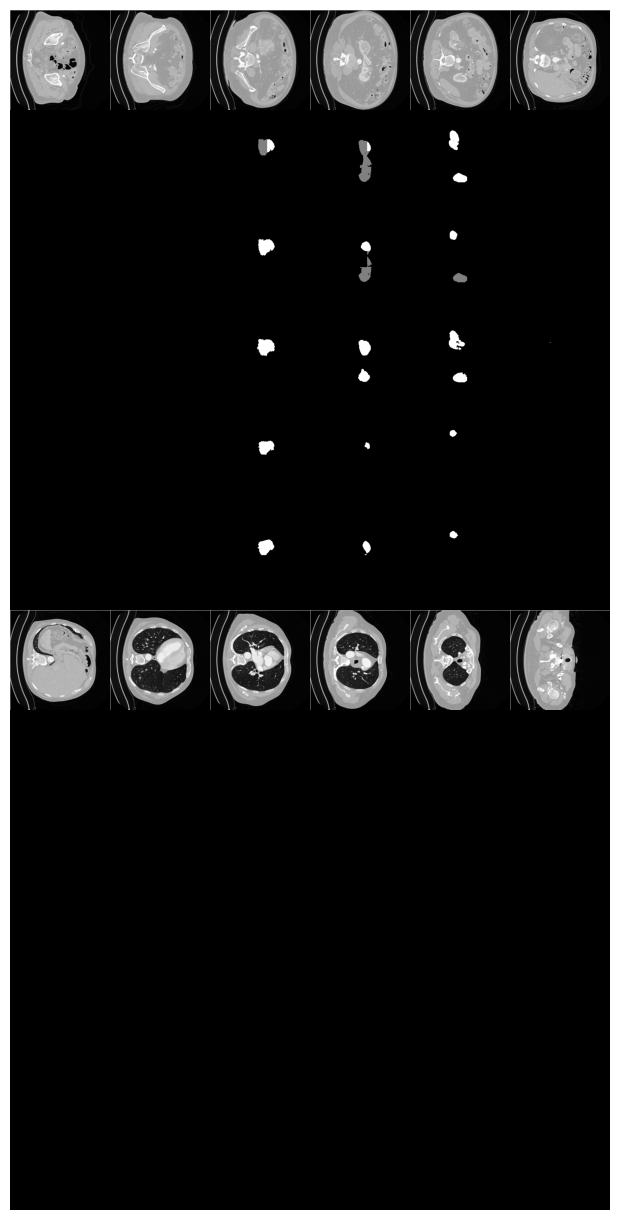

45
가 0번째에서 제일 잘 나옴
[0]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 49, 차이 = 238
(1, 224, 224, 224)
(1, 224, 224, 224)


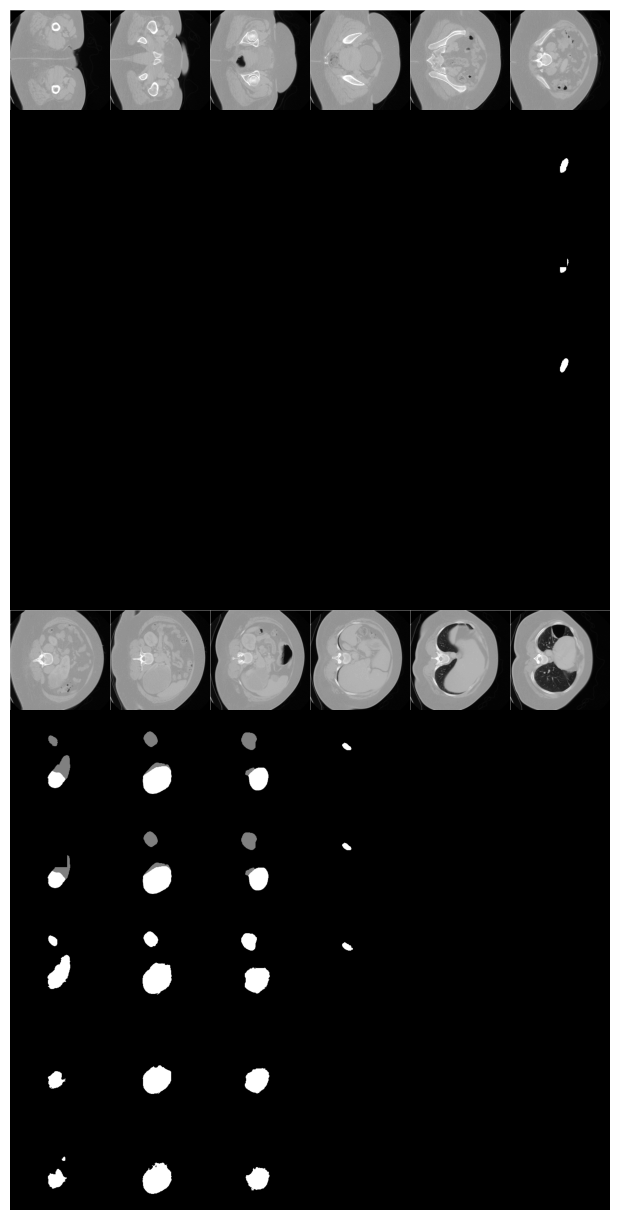

145
가 1번째에서 제일 잘 나옴
[1]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 163, 차이 = 562
(1, 224, 224, 224)
(1, 224, 224, 224)


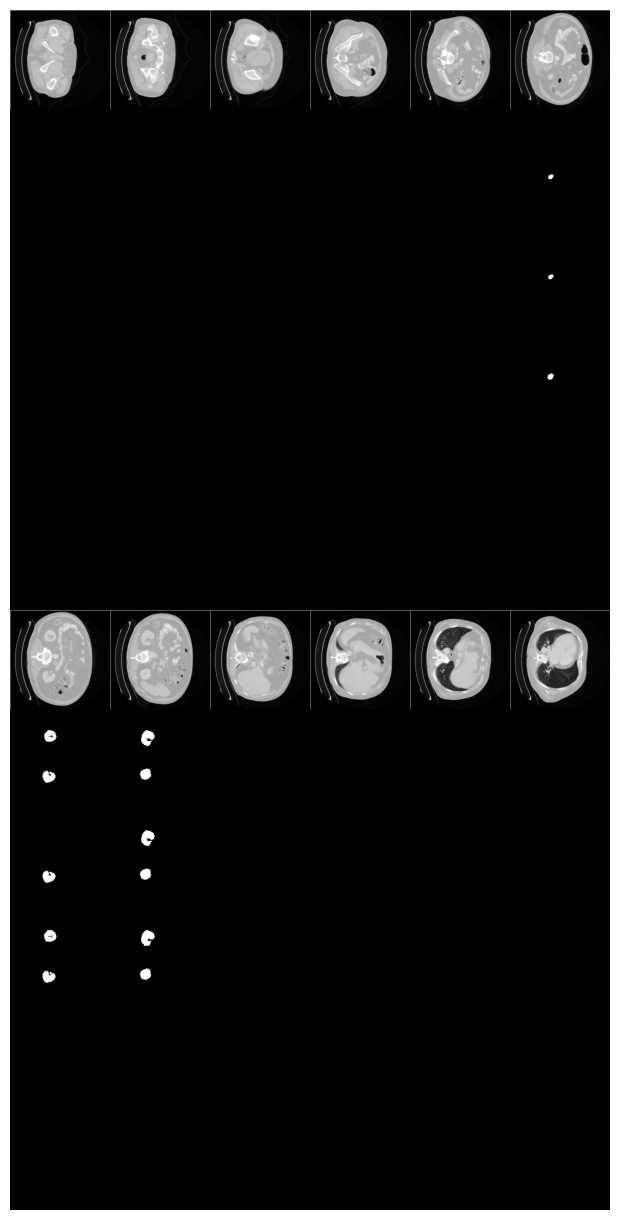

131
가 2번째에서 제일 잘 나옴
[2]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 123, 차이 = 37
(1, 224, 224, 224)
(1, 224, 224, 224)


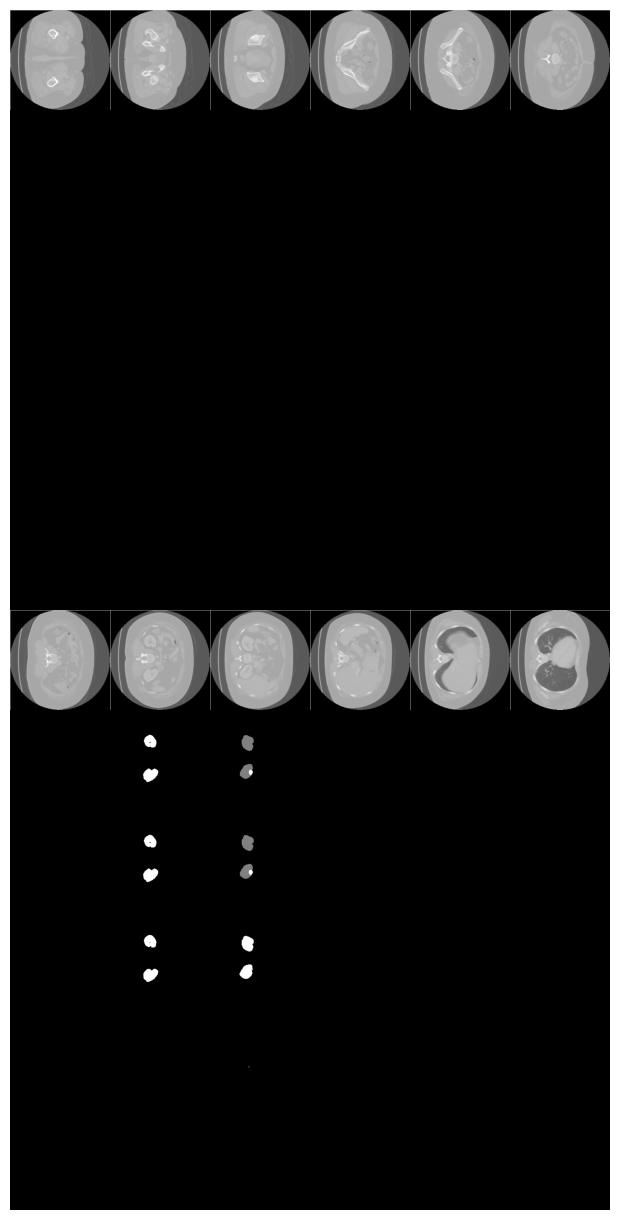

165
가 3번째에서 제일 잘 나옴
[3]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 165, 차이 = 19
(1, 224, 224, 224)
(1, 224, 224, 224)


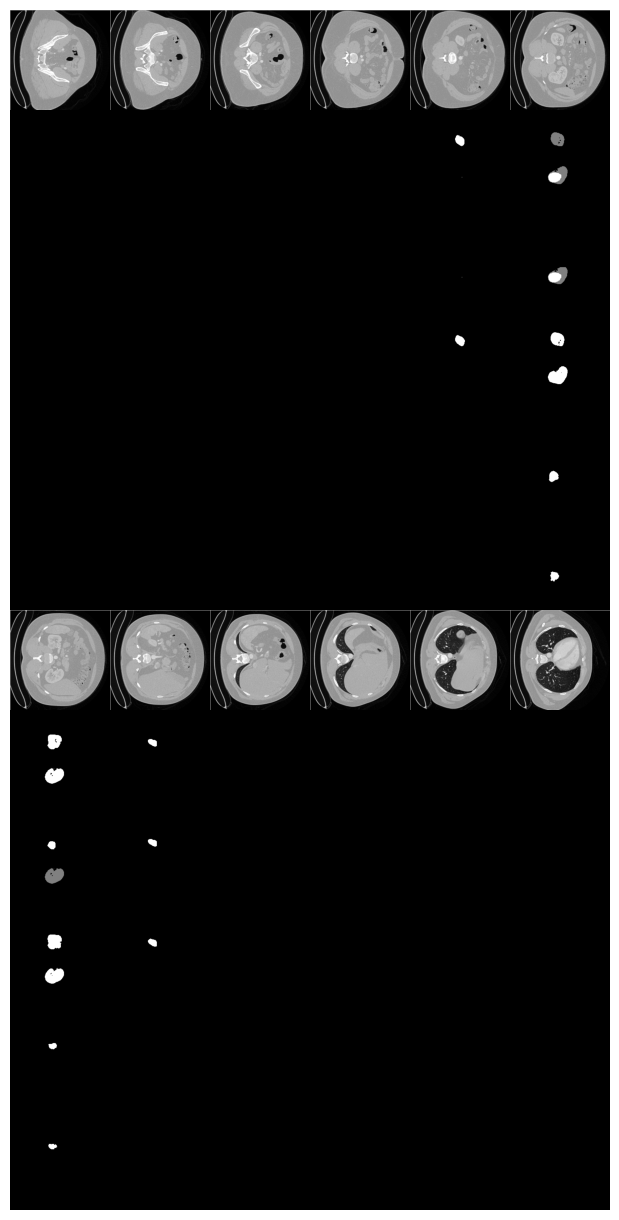

99
가 4번째에서 제일 잘 나옴
[4]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 107, 차이 = 188
(1, 224, 224, 224)
(1, 224, 224, 224)


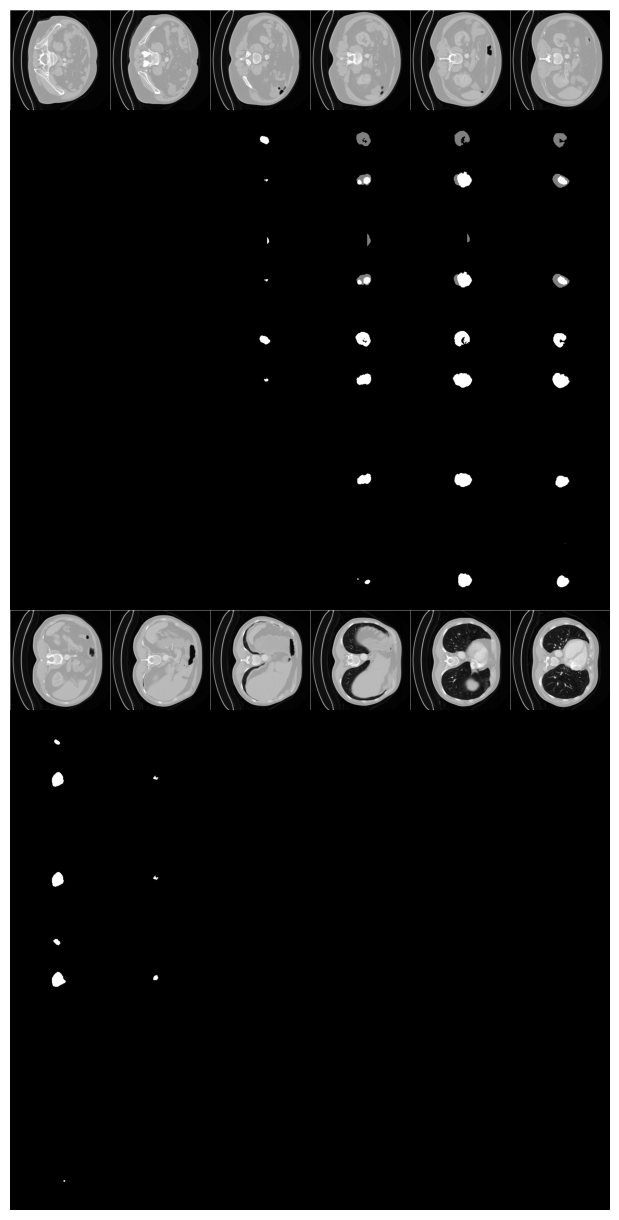

85
가 5번째에서 제일 잘 나옴
[5]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 61, 차이 = 477
(1, 224, 224, 224)
(1, 224, 224, 224)


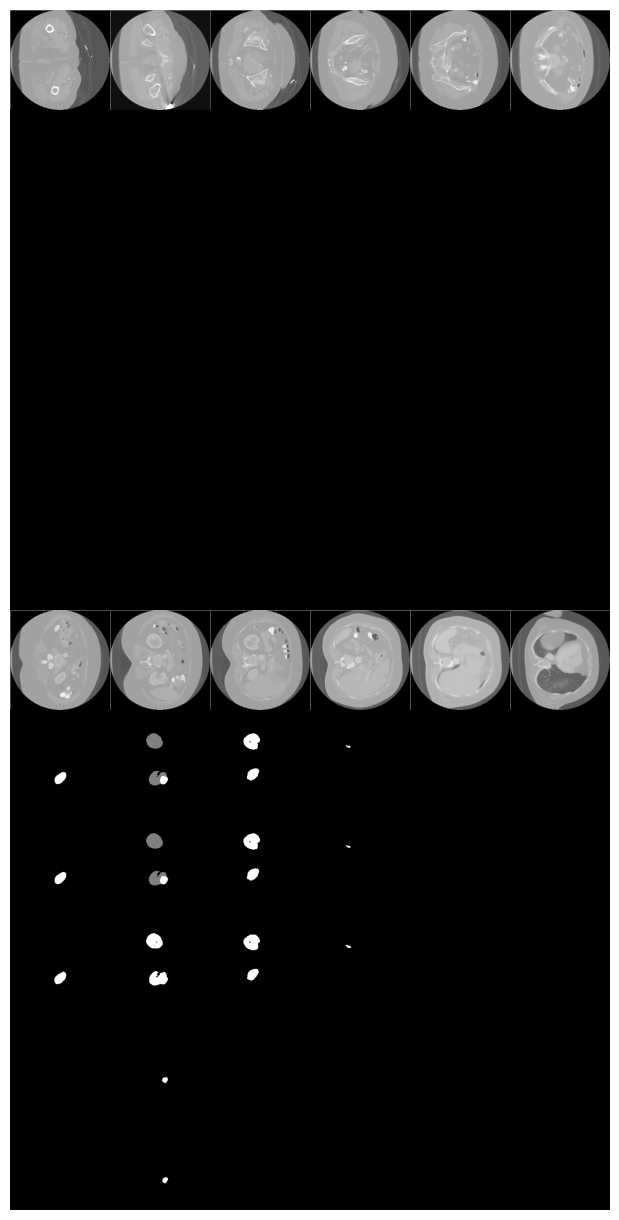

138
가 6번째에서 제일 잘 나옴
[6]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 147, 차이 = 45
(1, 224, 224, 224)
(1, 224, 224, 224)


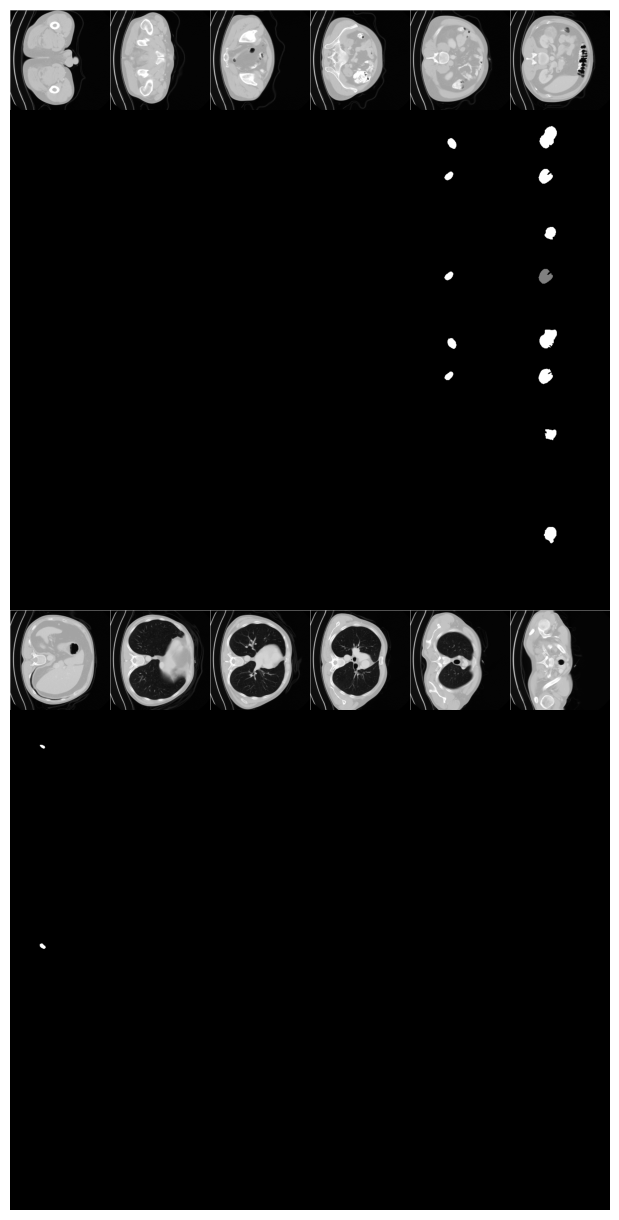

92
가 7번째에서 제일 잘 나옴
[7]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 91, 차이 = 322
(1, 224, 224, 224)
(1, 224, 224, 224)


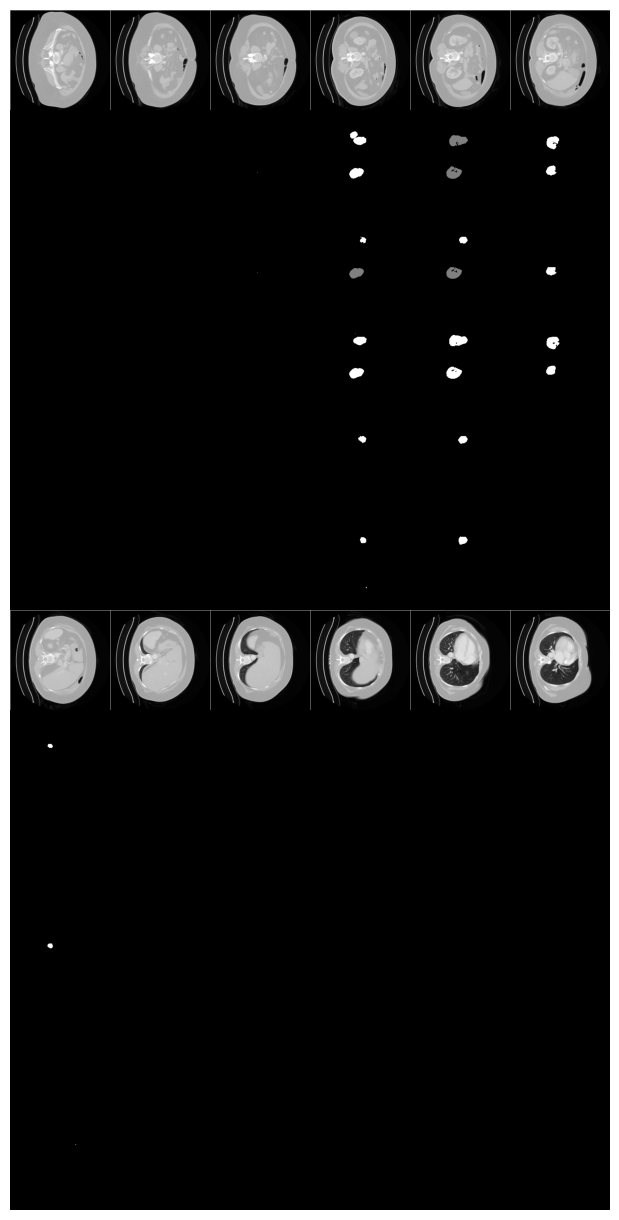

73
가 8번째에서 제일 잘 나옴
[8]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 59, 차이 = 75
(1, 224, 224, 224)
(1, 224, 224, 224)


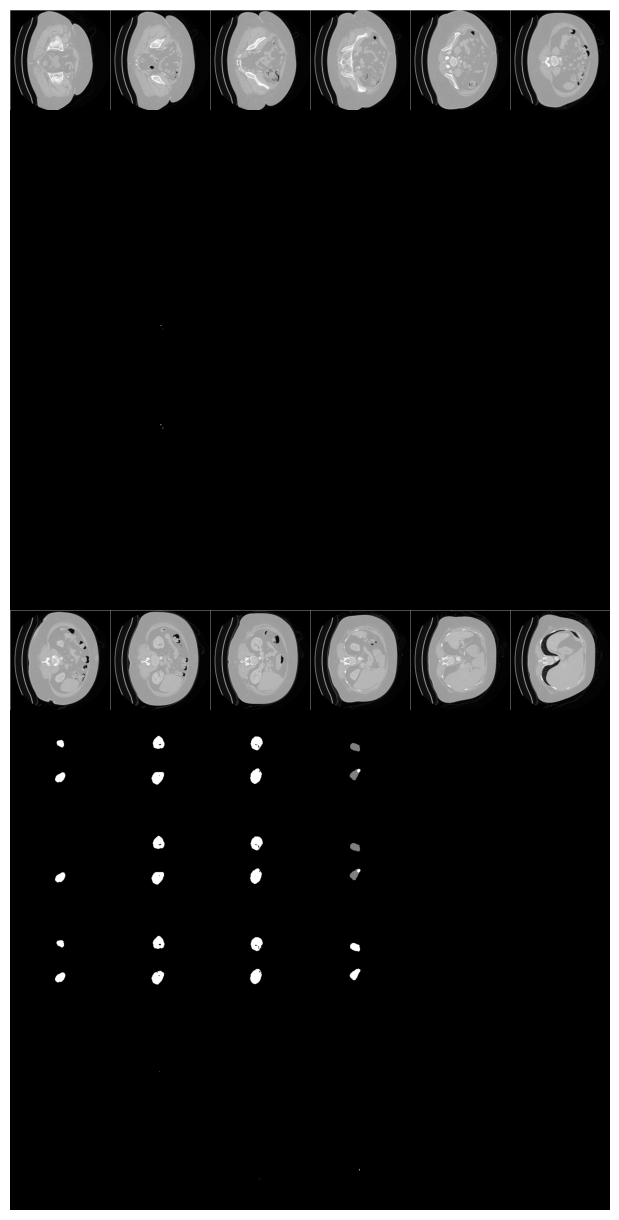

171
가 9번째에서 제일 잘 나옴
[9]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 13, 차이 = 92


In [13]:
import numpy as np
import matplotlib.pyplot as plt
image_size = 224
max_list = []
max_diff_list = []
max_diff_index_list = [] 
gt_diff_list = []
tp_diff_list = []
score_list = []
#Test set가 6개니까, 6명에 대한 데이터
for num in range(0, 10):
    gt_organ = np.load("res_target_patch_4_lr1e-3_fft_3" + str(num) + ".npy")
    gt_tumor = np.load("res_target_patch_4_lr1e-3_fft_3" + str(num) + ".npy")
    input_img = np.load("res_image_patch_4_lr1e-3_fft_3" + str(num) + ".npy")
    op = np.load("res_organ_prediction_patch_4_lr1e-3_fft_3" + str(num) + ".npy")
    tp = np.load("res_tumor_prediction_patch_4_lr1e-3_fft_3" + str(num) + ".npy")
    tp_2 = np.load(r"/home/gail11/orgunetr/Kideny_Orgswinunetr/orgswinunetr_monai/mon_tumor_prediction_patch_4_KITS19_lr1e-3_"+str(num)+".npy")
    ####
    print(tp.shape)
    print(tp_2.shape)
    for i in range(0, 128):
        for j in range(0, 128):
            for k in range(0, 128):
                if gt_organ[0, 0, i, j, k] == 2:
                    gt_organ[0, 0, i, j, k] = 1
                if gt_tumor[0, 0, i, j, k] != 2:
                    gt_tumor[0, 0, i, j, k] = 0

    ncols, nrows = 6, 6*2
    interval = 20
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols,nrows))
    cnt1, cnt2, cnt3, cnt4, cnt5, cnt6  = 0, 0, 0, 0, 0, 0
    for i in range(nrows):
        for j in range(ncols):
            if i%6 == 0:
                axes[i,j].imshow(input_img[0,0,:,:,cnt1], cmap='gray')
                cnt1+=interval
            if i%6 == 1:
                axes[i,j].imshow(gt_organ[0,0,:,:,cnt2], cmap='gray')
                cnt2+=interval
            if i%6 == 2:
                axes[i,j].imshow(gt_tumor[0,0,:,:,cnt3], cmap='gray')
                cnt3+=interval
            if i%6 == 3:
                axes[i,j].imshow(op[0,:,:,cnt4], cmap='gray')
                cnt4+=interval
            #5번째 행에 ORGUNETR의 tumor prediction 결과가
            if i%6 == 4:
                axes[i,j].imshow(tp[0,:,:,cnt5], cmap='gray')
                cnt5+=interval
            #6번째 행에 Baseline 모델의 tumor prediction 결과가 나옵니다.
            if i%6 == 5:
                axes[i,j].imshow(tp_2[0,:,:,cnt6], cmap='gray')
                cnt6+=interval
            axes[i,j].axis('off')
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.savefig('predictions_' + str(num) + '.png')
    plt.show()
    sums = []
    for i in range(image_size):
        x = np.sum(tp[0,:,:,i])
        sums.append(x)
    max_value = max(sums)
    sums_index = sums.index(max_value)
    
    print(sums_index)
    print(f'가 {num}번째에서 제일 잘 나옴')
    max_list.append(sums_index)
    max_diff = 0
    max_diff_index = 0
    for i in range(image_size):

        diff_sum = np.sum(np.abs(tp[0, :, :, i] - tp_2[0, :, :, i]))
        if diff_sum > max_diff:
            max_diff = diff_sum
            max_diff_index = i

    print(f"[{num}]번째 환자: tp가 gt에 더 가깝고 tp_2와는 가장 다른 slice는 {max_diff_index}, 차이 = {max_diff}")
    max_diff_list.append(max_diff)
    max_diff_index_list.append(max_diff_index)


    
 

In [ ]:
    max_diff_index_list=[40, 120, 123, 165, 107, 61, 140, 82, 80, 157] 

In [3]:
import numpy as np

def load_and_process_data(num):
    # 데이터 로드
    gt_organ = np.load("res_target_patch_4_lr1e-3_fft_3" + str(num) + ".npy")
    gt_tumor = np.load("res_target_patch_4_lr1e-3_fft_3" + str(num) + ".npy")
    input_img = np.load("res_image_patch_4_lr1e-3_fft_3" + str(num) + ".npy")
    op = np.load("res_organ_prediction_patch_4_lr1e-3_fft_3" + str(num) + ".npy")
    tp = np.load("res_tumor_prediction_patch_4_lr1e-3_fft_3" + str(num) + ".npy")
    tp_2 = np.load(r"/home/gail11/orgunetr/Kideny_Orgswinunetr/orgswinunetr_monai/mon_tumor_prediction_patch_4_KITS19_lr1e-3_"+str(num)+".npy")
    gt_organ = gt_organ.squeeze()  # (224, 224, 224)
    gt_tumor = gt_tumor.squeeze()
    input_img = input_img.squeeze()
    op = op.squeeze()
    tp = tp.squeeze()
    tp_2 = tp_2.squeeze()
    
    # 조건에 따른 라벨링 조정
    shape = gt_organ.shape[0]  # Assuming all arrays are the same shape
    for i in range(shape):
        for j in range(shape):
            for k in range(shape):
                if gt_organ[i, j, k] == 2:
                    gt_organ[i, j, k] = 1
                if gt_tumor[i, j, k] != 2:
                    gt_tumor[i, j, k] = 0

    return gt_organ, gt_tumor, input_img, op, tp, tp_2


In [4]:
def prepare_for_visualization(input_img, gt_organ, gt_tumor, op, tp, tp_2, slice_num):
    # 특정 슬라이스 선택
    organ_gt_slice = gt_organ[:,:,slice_num].copy()
    tumor_gt_slice = gt_tumor[:,:,slice_num].copy()
    organ_pred_slice = op[:,:,slice_num].astype(float).copy()
    tumor_pred_slice = tp[:,:,slice_num].astype(float).copy()
    tumor_pred_2_slice = tp_2[:,:,slice_num].astype(float).copy()
    input_img  = input_img[:,:,slice_num].astype(float).copy()
    # 시각화를 위한 조건부 None 할당
    organ_gt_slice[organ_gt_slice == 0] = None
    tumor_gt_slice[tumor_gt_slice == 0] = None
    organ_pred_slice[organ_pred_slice == 0] = None
    tumor_pred_slice[tumor_pred_slice == 0] = None
    tumor_pred_2_slice[tumor_pred_2_slice == 0] = None

    return input_img, organ_gt_slice, tumor_gt_slice, organ_pred_slice, tumor_pred_slice, tumor_pred_2_slice


patch_0 ~ patch_5까지 중 제일 Baseline과 Propoesed model과의 차이가 눈에 보이는 이미지들을 임의로 선정하였습니다.

In [ ]:
nums = [0, 1, 4, 5,6, 7,8]  # 사용할 파일 번호 리스트
# slice_nums = [49, 163, 107, 61, 91]  # = max_list # 각 파일에 대한 슬라이스 번호


gt_organ_0, gt_tumor_0, input_img_0, op_0, tp_0, tp_0_2 = load_and_process_data(nums[0])
input_img_0,organ_gt_0, tumor_gt_0, organ_pred_0, tumor_pred_0, tumor_pred_0_2 = prepare_for_visualization(input_img_0,gt_organ_0, gt_tumor_0, op_0, tp_0, tp_0_2, max_diff_index_list[0])

    # 여기에 시각화 코드 추가
gt_organ_1, gt_tumor_1, input_img_1, op_1, tp_1, tp_1_2 = load_and_process_data(nums[1])
input_img_1, organ_gt_1, tumor_gt_1, organ_pred_1, tumor_pred_1, tumor_pred_1_2 = prepare_for_visualization(input_img_1, gt_organ_1, gt_tumor_1, op_1, tp_1, tp_1_2, max_diff_index_list[1])

gt_organ_2, gt_tumor_2, input_img_2, op_2, tp_2, tp_2_2 = load_and_process_data(nums[2])
input_img_2, organ_gt_2, tumor_gt_2, organ_pred_2, tumor_pred_2, tumor_pred_2_2 = prepare_for_visualization(input_img_2, gt_organ_2, gt_tumor_2, op_2, tp_2, tp_2_2, max_diff_index_list[4])

gt_organ_3, gt_tumor_3, input_img_3, op_3, tp_3, tp_3_2 = load_and_process_data(nums[3])
input_img_3, organ_gt_3, tumor_gt_3, organ_pred_3, tumor_pred_3, tumor_pred_3_2 = prepare_for_visualization(input_img_3,gt_organ_3, gt_tumor_3, op_3, tp_3, tp_3_2, max_diff_index_list[5])

gt_organ_4, gt_tumor_4, input_img_4, op_4, tp_4, tp_4_2 = load_and_process_data(nums[4])
input_img_4, organ_gt_4, tumor_gt_4, organ_pred_4, tumor_pred_4, tumor_pred_4_2 = prepare_for_visualization(input_img_4, gt_organ_4, gt_tumor_4, op_4, tp_4, tp_4_2, max_diff_index_list[6])


gt_organ_5, gt_tumor_5, input_img_5, op_5, tp_5, tp_5_2 = load_and_process_data(nums[5])
input_img_5, organ_gt_5, tumor_gt_5, organ_pred_5, tumor_pred_5, tumor_pred_5_2 = prepare_for_visualization(input_img_5, gt_organ_5, gt_tumor_5, op_5, tp_5, tp_5_2, max_diff_index_list[7])

gt_organ_6, gt_tumor_6, input_img_6, op_6, tp_6, tp_6_2 = load_and_process_data(nums[6])
input_img_6, organ_gt_6, tumor_gt_6, organ_pred_6, tumor_pred_6, tumor_pred_6_2 = prepare_for_visualization(input_img_6, gt_organ_6, gt_tumor_6, op_6, tp_6, tp_6_2, max_diff_index_list[8])


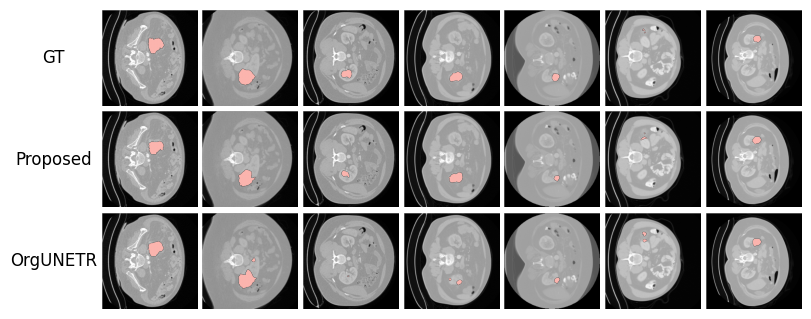

In [16]:
import numpy as np
import matplotlib.pyplot as plt
ncols, nrows = 7, 3  # Swapping ncols with nrows
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols, nrows))  # Adjust figsize accordingly
axes[0,0].imshow(input_img_0, cmap='gray', alpha=1)
axes[0,0].imshow(tumor_gt_0, cmap='Pastel1')
axes[0,1].imshow(input_img_1, cmap='gray', alpha=1)
axes[0,1].imshow(tumor_gt_1, cmap='Pastel1')
axes[0,2].imshow(input_img_2, cmap='gray', alpha=1)
axes[0,2].imshow(tumor_gt_2, cmap='Pastel1')
axes[1,0].imshow(input_img_0, cmap='gray', alpha=1)
axes[1,0].imshow(tumor_pred_0, cmap='Pastel1')
axes[1,1].imshow(input_img_1, cmap='gray', alpha=1)
axes[1,1].imshow(tumor_pred_1, cmap='Pastel1')
axes[1,2].imshow(input_img_2, cmap='gray', alpha=1)
axes[1,2].imshow(tumor_pred_2, cmap='Pastel1')
axes[2,0].imshow(input_img_0, cmap='gray', alpha=1)
axes[2,0].imshow(tumor_pred_0_2, cmap='Pastel1')
axes[2,1].imshow(input_img_1, cmap='gray', alpha=1)
axes[2,1].imshow(tumor_pred_1_2, cmap='Pastel1')
axes[2,2].imshow(input_img_2, cmap='gray', alpha=1)
axes[2,2].imshow(tumor_pred_2_2, cmap='Pastel1')
axes[0,3].imshow(input_img_3, cmap='gray', alpha=1)
axes[0,3].imshow(tumor_gt_3, cmap='Pastel1')
axes[1,3].imshow(input_img_3, cmap='gray', alpha=1)
axes[1,3].imshow(tumor_pred_3, cmap='Pastel1')
axes[2,3].imshow(input_img_3, cmap='gray', alpha=1)
axes[2,3].imshow(tumor_pred_3_2, cmap='Pastel1')
axes[0,4].imshow(input_img_4, cmap='gray', alpha=1)
axes[0,4].imshow(tumor_gt_4, cmap='Pastel1')
axes[1,4].imshow(input_img_4, cmap='gray', alpha=1)
axes[1,4].imshow(tumor_pred_4, cmap='Pastel1')
axes[2,4].imshow(input_img_4, cmap='gray', alpha=1)
axes[2,4].imshow(tumor_pred_4_2, cmap='Pastel1')
axes[0,5].imshow(input_img_5, cmap='gray', alpha=1)
axes[0,5].imshow(tumor_gt_5, cmap='Pastel1')
axes[1,5].imshow(input_img_5, cmap='gray', alpha=1)
axes[1,5].imshow(tumor_pred_5, cmap='Pastel1')
axes[2,5].imshow(input_img_5, cmap='gray', alpha=1)
axes[2,5].imshow(tumor_pred_5_2, cmap='Pastel1')
axes[0,6].imshow(input_img_6, cmap='gray', alpha=1)
axes[0,6].imshow(tumor_gt_6, cmap='Pastel1')
axes[1,6].imshow(input_img_6, cmap='gray', alpha=1)
axes[1,6].imshow(tumor_pred_6, cmap='Pastel1')
axes[2,6].imshow(input_img_6, cmap='gray', alpha=1)
axes[2,6].imshow(tumor_pred_6_2, cmap='Pastel1')

# axes[0,4].imshow(input_img_4, cmap='gray', alpha=1)
# axes[0,4].imshow(tumor_gt_4, cmap='Pastel1')
# axes[1,4].imshow(input_img_4, cmap='gray', alpha=1)
# axes[1,4].imshow(tumor_pred_4, cmap='Pastel1')
# axes[2,4].imshow(input_img_4, cmap='gray', alpha=1)
# axes[2,4].imshow(tumor_pred_4_2, cmap='Pastel1')
for i in range(0, 3):  # Adjusted loop range
    for j in range(0, 7):  # Adjusted loop range
        axes[i, j].axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0, right=1, bottom=0, top=1)

# fig.text(-0.11, 0.83, "GT", ha='left', va='center', rotation=0)
# fig.text(-0.16, 0.51, "ORGUnetr", ha='left', va='center', rotation=0)
# fig.text(-0.15, 0.17, "Baseline", ha='left', va='center', rotation=0)
# fig.text(0.05, 0.9, "GT", ha='left', va='center', rotation=0)
# fig.text(0.05, 0.6, "ORGUnetr", ha='left', va='center', rotation=0)
# fig.text(0.05, 0.3, "Baseline", ha='left', va='center', rotation=0)
for ax_idx, title in enumerate(["GT", "Proposed", "OrgUNETR"]):
    # 각 축의 위치를 가져옵니다.
    pos = axes[ax_idx, 0].get_position()
    # 새로운 축을 같은 위치에 만듭니다.
    fake_ax = fig.add_axes(pos)
    # 축 경계선과 눈금을 숨깁니다.
    fake_ax.axis('off')
    # 축의 왼쪽 중앙에 텍스트를 추가합니다. y값은 0.5로 고정하고, x값은 적절히 조정합니다.
    fake_ax.text(-0.5, 0.5, title, transform=fake_ax.transAxes, 
                 ha='center', va='center', rotation=0, fontsize='large')

# 기존 축의 제목을 삭제합니다.
for ax in axes.flatten():
    ax.set_title("")
plt.savefig('가로', dpi=1000)  
# 저장할 파일 경로를 적절히 수정하세요.
plt.show()
# set_ylabel 함수는 기본적으로 축의 바로 옆에 레이블을 추가합니다.
# 위치를 조절하려면 labelpad 매개변수를 사용하세요.
# 예를 들어, 더 멀리 떨어진 위치에 레이블

In [14]:
    max_diff_index_list=[40, 120, 123, 165, 107, 61, 140, 82, 80, 157] #알아서 조정

In [15]:
gt_organ_5, gt_tumor_5, input_img_5, op_5, tp_5, tp_5_2 = load_and_process_data(nums[5])
input_img_5, organ_gt_5, tumor_gt_5, organ_pred_5, tumor_pred_5, tumor_pred_5_2 = prepare_for_visualization(input_img_5, gt_organ_5, gt_tumor_5, op_5, tp_5, tp_5_2, max_diff_index_list[7])
